# 1 分类和回归

* 分类(classification)
* 回归(regression)

# 2 泛化、过拟合和欠拟合

* 泛化(generalize)
* 过拟合(over fitting)
* 欠拟合(under fitting)

> 模型复杂度和数据集大小的关系: 数据集中包含的数据点的变化范围越大，在不发生过拟合的前提下你可以使用的模型就越复杂。

# 3 监督学习

## 3.1 一些样本数据

**模拟的二分类数据集示例: forge 数据集**


Text(0, 0.5, '第二特征')

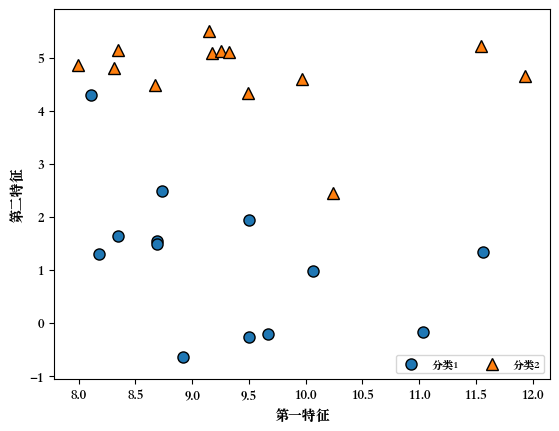

In [135]:
from __future__ import annotations

from mglearn.datasets import make_forge
import mglearn
import matplotlib.pyplot as plt
import numpy as np

# 中文
plt.rcParams['font.family'] = ['Songti SC', 'Gill Sans']

X, y = make_forge()

mglearn.discrete_scatter(X[:, 0], X[:, 1], y, s=8, markeredgewidth=1)
# 图例 loc 位置, prop 可以设置一些属性, ncol 一列多少项
plt.legend(['分类1', '分类2'], loc=4, prop={'size': 8}, ncol=2)
plt.xlabel("第一特征")
plt.ylabel("第二特征")

**模拟回归算法的数据集 wave**

Text(0, 0.5, '目标值')

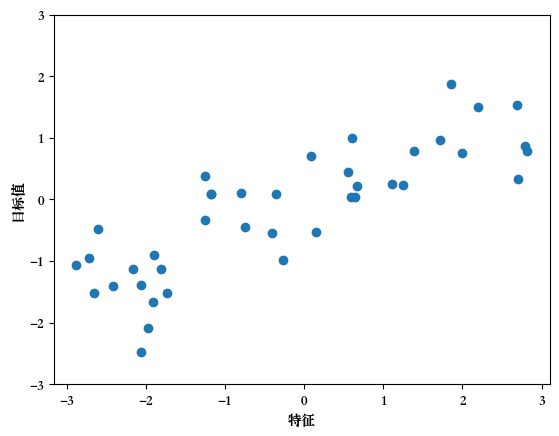

In [136]:
X, y = mglearn.datasets.make_wave(n_samples=40)

plt.scatter(X, y)
plt.ylim(-3, 3)
plt.xlabel("特征")
plt.ylabel("目标值")


**scikit-learn 中癌症的数据集 cancer**

In [137]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

f"cancer keys: {cancer.keys()}"

"cancer keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])"

In [138]:
f"cancer feature names: {cancer.feature_names}"

"cancer feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'\n 'mean smoothness' 'mean compactness' 'mean concavity'\n 'mean concave points' 'mean symmetry' 'mean fractal dimension'\n 'radius error' 'texture error' 'perimeter error' 'area error'\n 'smoothness error' 'compactness error' 'concavity error'\n 'concave points error' 'symmetry error' 'fractal dimension error'\n 'worst radius' 'worst texture' 'worst perimeter' 'worst area'\n 'worst smoothness' 'worst compactness' 'worst concavity'\n 'worst concave points' 'worst symmetry' 'worst fractal dimension']"

**回归数据集: sklearn 现实中房价**

In [139]:
from sklearn.datasets import fetch_california_housing

housing_price = fetch_california_housing()

housing_price.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

## 3.2 k近邻
k-NN 算法可以说是最简单的机器学习算法。

### 1. k近邻分类

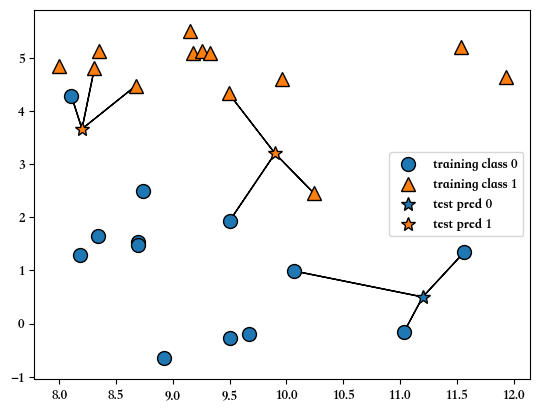

In [140]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

通过 scikit-learn 来应用 k 近邻算法。

In [141]:
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_forge()

# 将数据拆分维训练集和测试集
# random_state 表示拆分之前数据集的搅乱次数
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


from sklearn.neighbors import KNeighborsClassifier
# 分类器，用来保存数据集
clf = KNeighborsClassifier(n_neighbors=3)
# 填充数据进行训练
clf.fit(X_train, y_train)
# 使用生成的模型预测测试集
np.array([clf.predict(X_test), y_test])

array([[1, 0, 1, 0, 1, 0, 0],
       [1, 0, 1, 0, 1, 1, 0]])

In [142]:
# 使用测试集评估模型的好坏
clf.score(X_test, y_test)

0.8571428571428571

### 2. 分析 KNeighborsClassifier

将 1个、3个、9个邻居三种情况做决策边界并可视化。

> 决策边界的生成规则是:
> 将特征数据取最大最小值，然后划分成多份，对划分进行数据预测
> 使用等高线生成的预测数据集进行登高划分

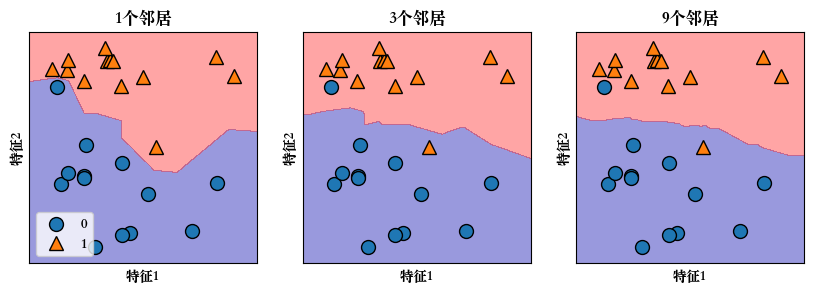

In [143]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes): # type: int, plt.Subplot
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(f"{n_neighbors}个邻居")
    ax.set_xlabel("特征1")
    ax.set_ylabel("特征2")

axes[0].legend(loc=3)

邻居个数变多了以后，决策边界就会变的更加圆滑。要使用更少的邻居对应更高的模型复杂度。

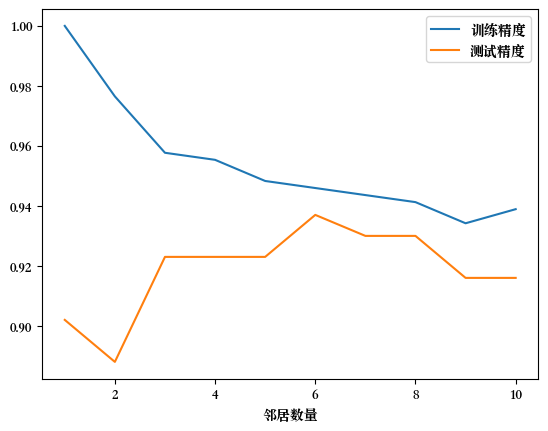

In [144]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

# n_neighbors 取值从 1-10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # 构建模型
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 记录训练精度
    training_accuracy.append(clf.score(X_train, y_train))
    # 记录泛化精度
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="训练精度")
plt.plot(neighbors_settings, test_accuracy, label="测试精度")
plt.xlabel("精度")
plt.xlabel("邻居数量")
plt.legend()


左侧一个邻居的模型会出现过拟合，模型过于简单。最优的结果应该是在中间部分 大约 6 的位置。

### 3. k邻近回归

k邻近也可以用于回归。预测结果为最近的邻居节点的均值。

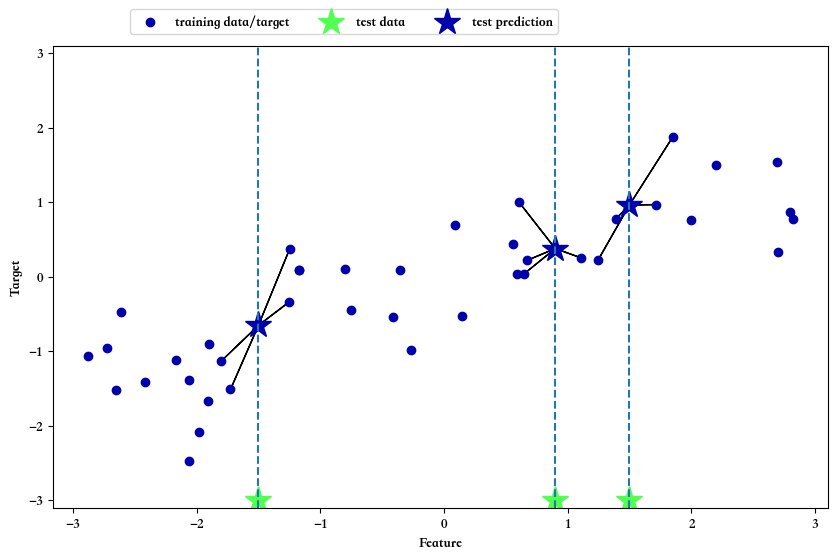

In [145]:
mglearn.plots.plot_knn_regression(n_neighbors=4)

sklearn 中的 KNeighborsRegressor 类中

In [146]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# 初始化模型, 并指定邻居节点数量
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

np.array([reg.predict(X_test), y_test])

array([[-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
        -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398],
       [ 0.37299129,  0.21778193,  0.96695428, -1.38773632, -1.05979555,
        -0.90496988,  0.43655826,  0.7789638 , -0.54114599, -0.95652133]])

In [147]:
reg.score(X_train, y_train), reg.score(X_test, y_test)

(0.8194343929538755, 0.8344172446249605)

### 4. 分析 KNeighborsRegressor

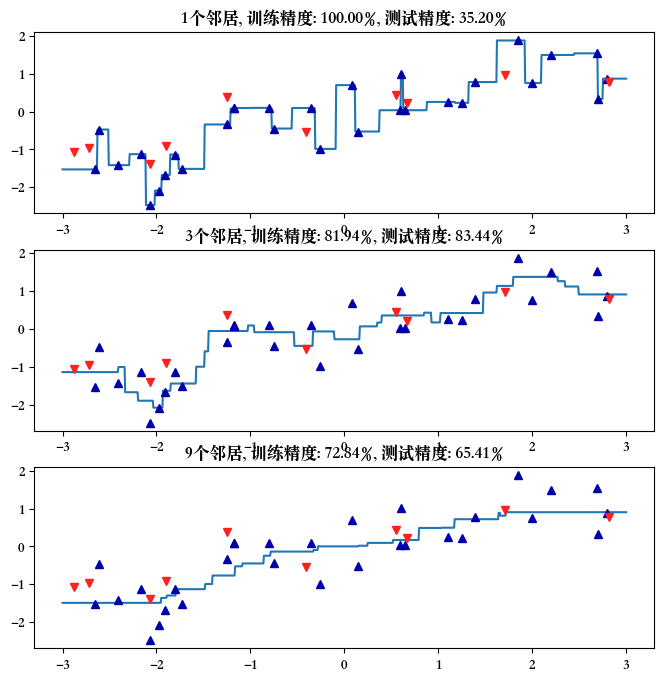

In [150]:
fig, axes = plt.subplots(3, 1, figsize=(8, 8))

# reshape 第一个参数 -1 表示 你reshape成多少行我不管，我只要数据变成 1 列
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes): # type: int, plt.Subplot
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    # 计算点上预测数值
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0))
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1))
    ax.set_title(f"{n_neighbors}个邻居, 训练精度:{reg.score(X_train, y_train) * 100: .2f}%, 测试精度:{reg.score(X_test, y_test) * 100: .2f}%")

### 5. 优点、缺点和参数

* 邻居个数
* 距离的度量方法

优点: 模型容易理解
缺点: 训练集大预测速度会比较慢

## 3.3 线性模型

### 1.用于回归的线性模型

w[0]: 0.393906  b: -0.031804


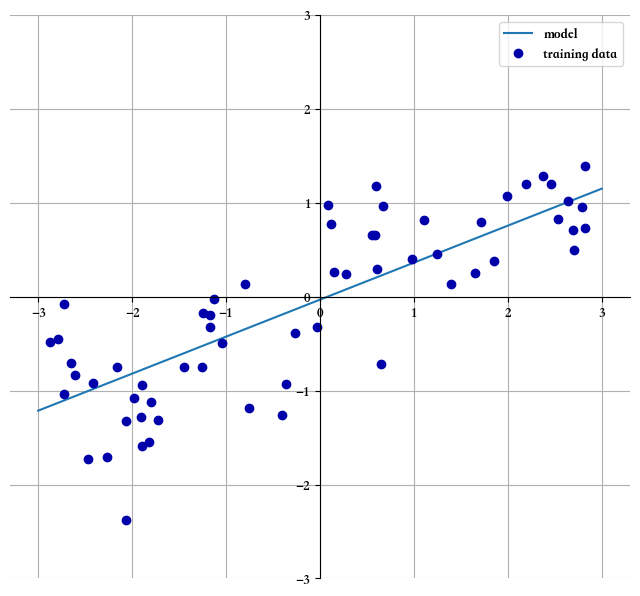

In [149]:
mglearn.plots.plot_linear_regression_wave()

### 2. 线性回归 (普通最小二乘法， ordinary least squares, OLS)

预测使**均方误差(mean squared error)**最小。

In [153]:
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

# w 权重或系数被保存在 coef_ 属性中, b 偏移或截距被保存在 intercept_ 属性中
lr.coef_, lr.intercept_

(array([0.39390555]), -0.03180434302675976)

> sklearn 将所有训练数据后所得到的属性值都以 _ 结尾, 已便将用户设置的参数分开。

In [154]:
# 看下训练精度和测试精度

lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.6700890315075756, 0.65933685968637)

### 3. 岭回归 (Ridge)

对系数进行正则化约束。
如果数据量巨大，正则化则会显得没那么必要。

### 4. lasso
于 Ridge 类似，不过 lasso 使用 L1 正则化, Ridge 使用 L2 正则化。

### 5. 用于分类的线性模型

* **Logistic 回归 (logistic regression): ** linear_model.LogisticRegression
* **线性支持向量机 (linear support vector machine): ** svm.LinearSVC

/Users/wttch/workspace/PG/AI/lib/python3.9/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


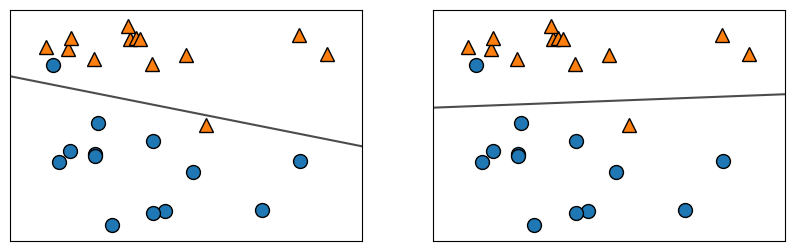

In [168]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3)) # type: plt.Figure, plt.Subplot

reg = LogisticRegression()
linear = LinearSVC(dual=True)

def show(model: LogisticRegression or LinearSVC, ax: plt.Subplot):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=.5, ax=ax, alpha=.7)
    
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
show(reg, axes[0])
show(linear, axes[1])

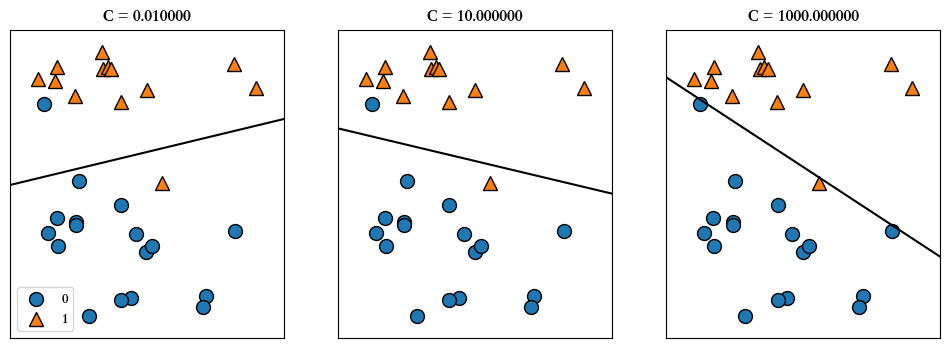

In [169]:
mglearn.plots.plot_linear_svc_regularization()

## 3.4 朴素贝叶斯分类器